In [1]:
import math
import numpy as np
from ROOT import TCanvas, TH1D, TF1
from numpy import random

Welcome to JupyROOT 6.22/03


Este notebook contém as respostas para os 3 primeiros exercícios da lista de Método de Monte Carlo do Curso de Análise de Dados. UERJ 2020-2.

1 - Escreva um código para estimar a área do disco unitário usando o método de Monte Carlo da rejeição. Sabemos que o raio do disco unitário é 1, então o círculo unitário está inscrito dentro de uma quadrado de tamanho 2. Dica: Gerar amostras dentro deste quadrado e contar o número de pontos que caem dentro do disco. Para testar se o ponto está dentro (acerto) ou fora (erro) do disco, nós simplesmente precisamos medir a distância da amostra até a origem (o centro do disco) e checar se a distância é menor do que o raio de disco (que no caso do disco unitário é 1). 

In [2]:
N = 100000 # Número de contagens.
j=0
for i in range (0,N):
    # Gerar um par de números aleatórios entre -1 e 1
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    # Calcular a distância ao centro (0,0)
    r = (x**2+y**2)**(0.5)
    # Verificar se o ponto está dentro do círculo unitário centrado na origem
    if (r<=1):
        j = j+1

print("pi = ", 4*j/N)

pi =  3.14296


No final, multiplicamos por 4 pois a razão entre a área no círculo ($=\pi$) e a área do quadrado ($=4$) é $\frac{\pi}{4}$. Este método permite encontrarmos um valor aproximado para a constante $\pi$.

2 - Calcule a integral a seguir utilizando ambos métodos (rejeição e direto).

$$\int_{0}^{3}dx \ (1-x^{2})^{2}$$

Utilizando o método da rejeição:

In [3]:
# Função que calcula o valor da função dada acima, num ponto x qualquer
def func (x):
    return (1-x**2)**(2)

O valor máximo da função acima no intervalo (0,3) ocorre quando $x=3$, ou seja, $f(3) = 64$. Portanto, vamos considerar um retângulo de base 3, ou seja (0,3) em $x$ e de altura 64, ou seja (0,64) em $y$. O método na rejeição nos diz que a razão entre as áreas destas figuras geométricas é igual à área entre os pontos aleatórios que são marcados dentro e fora destas curvas.

In [4]:
N = 100000 # número de contagens
fmax=64 # Valor máximo da função no intervalo (a,b)
j= 0 
for i in range(0,N):
    # Gerar um par de números aleatórios dentro do retângulo (0,3)x(0,64)
    x = random.uniform(0,3)
    y = random.uniform(0,fmax)
    # Calcular o valor da função neste valor de x gerando anteriormente
    f = func(x)
    # Verificar se o ponto gerado está abaixo da curva f(x)
    if (y<=f):
        j = j+1
print(" A área da função na região dada é de ", 64*3*j/N)

 A área da função na região dada é de  33.21792


Utilizando o método direito:

O método direito calcula a área sob uma curva $f(x)$ a partir de distribuições uniformes de números aleatórios em um intervalo (0,1). Para tal, consideramos as transformações $x'=\frac{x-a}{b-a}$ e calculamosa integral diretamente a partir de: $$I = \frac{b-a}{N}\sum_{i=1}^{N}f[x_{i}(b-a)+a]$$ sendo $x_{i}=x_{1},x_{2},x_{3},\dots,x_{N}$ uma sequência de $N$ números aleatórios entre 0 e 1.

In [5]:
N = 100000
a = 0
b = 3
I = 0
for i in range(0,N):
    x = random.uniform(0,1)
    I = I + func(x*(b-a)+a)
I = I*(b-a)/N
print ("I = ", I)

I =  33.492099664276026


3 - Escreva um código para calcular a seção de choque diferencial para o espalhamento de Rutherford.

Abaixo declaramos as constantes utilizadas no problema.

In [6]:
#Constantes
m = 4*10e9 # GeV, massa da partícula alpha
e = 1.6e-19 # carga do elétron
epsilon = 8.85*10e-12 # permeabilidade elétrica

Abaixo, declaramos o histograma e o canvas

In [7]:
c1 = TCanvas( 'c1', 'canvas', 200, 10, 700, 500 )
h1 = TH1D( 'h1', 'Secao de choque de Rutherford', 100, -1.6, 1.6 )
h1.GetXaxis().SetTitle("#theta")
h1.GetYaxis().SetTitle("secao de choque diferencial")

Utilizando o método da rejeição, calculamos a seção de choque de Rutherford. Diferentemente da seção de choque do espalhamento Compton, neste caso temos uma divergência em $\theta=0$. A diferença será no valor máximo de seção de choque considerado. Vamos considerar, de forma arbitrária, que a seção de choque máxima ocorre para $\theta_{\text{máx}}=0.1$. O valor pode ser tão próximo de 0 quanto se queira, mas este foi o que obtivemos o melhor resultado.

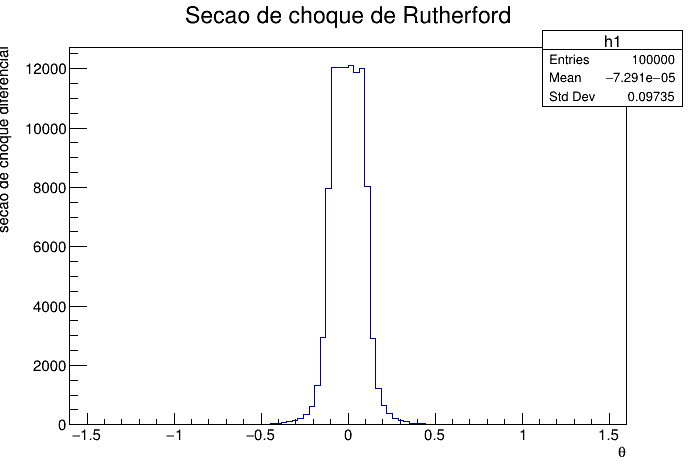

In [8]:
N = 100000 # número de eventos
v = 10e7 # velocidade inicial da partícula alpha (~10%c)

for i in range(N):
    
    while(True):        
        # Gerando um valor aleatório para theta, entre -pi/2 e pi/2
        theta = random.uniform(-math.pi/2,math.pi/2)
        # O valor máximo para a seção de choque será escolhido, de maneira arbitrária, 
        # no ponto theta=0.1 rad, devido à divergência da seção de choque em theta=0. 
        theta_max = 0.1
        max_ruther = ((e/(8*math.pi*epsilon*m*v**2))**2)*(1/math.sin(theta_max/2))**4
        # Gerando valores aleatórios para a seção de choque, entre 0 e seu valor máximo.
        y = random.uniform(0,max_ruther)
        
        # Cálculo da seção de choque
        sigma = ((e/(8*math.pi*epsilon*m*v**2))**2)*(1/math.sin(theta/2))**4
        
        # Método da rejeição
        if (y <= sigma): 
            h1.Fill(theta)
            break

# Desenhando o histograma
h1.Draw()    
c1.Draw()